In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltNew
import pandas as pd
import seaborn as sn

from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

In [3]:
link = "https://raw.githubusercontent.com/Yujima/Projek-KNN-ML/refs/heads/master/dataset/seattleWeather_1948-2017.csv"
dataset = pd.read_csv(link)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [4]:
data = dataset
data = data.drop('DATE', axis=1)
data["RAINTOMORROW"] = None
for i in range(1,len(data)):
  data.loc[i, 'RAINTOMORROW'] = data.loc[i-1, 'RAIN']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRCP          25548 non-null  float64
 1   TMAX          25551 non-null  int64  
 2   TMIN          25551 non-null  int64  
 3   RAIN          25548 non-null  object 
 4   RAINTOMORROW  25547 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
data.isnull().sum()

,0
PRCP,3
TMAX,0
TMIN,0
RAIN,3
RAINTOMORROW,4


In [6]:
data = data.dropna()
data.isnull().sum()

,0
PRCP,0
TMAX,0
TMIN,0
RAIN,0
RAINTOMORROW,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25545 entries, 1 to 25550
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRCP          25545 non-null  float64
 1   TMAX          25545 non-null  int64  
 2   TMIN          25545 non-null  int64  
 3   RAIN          25545 non-null  object 
 4   RAINTOMORROW  25545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [9]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

k =  1
Average Accuracy: 0.6352325579613423
Average Precision: 0.5713454630450026
Average Recall: 0.5812220294744765


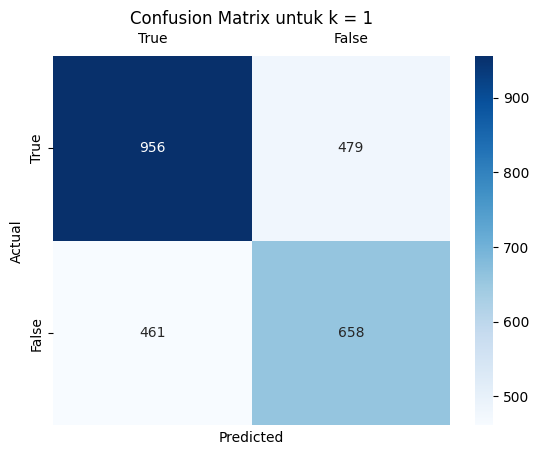

 
k =  3
Average Accuracy: 0.6719518134325957
Average Precision: 0.6163325395461658
Average Recall: 0.612801823761764


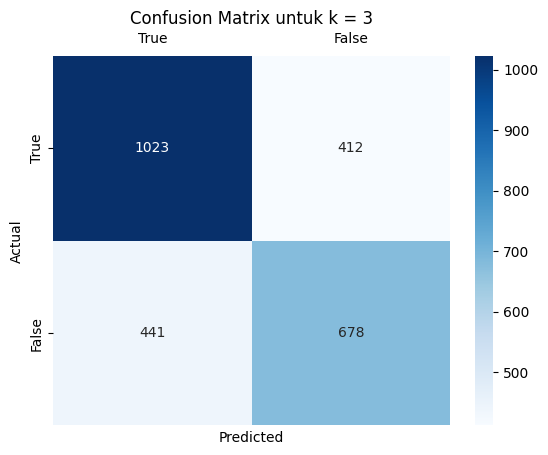

 
k =  5
Average Accuracy: 0.6885889598756871
Average Precision: 0.6369905920525414
Average Recall: 0.6286531864168813


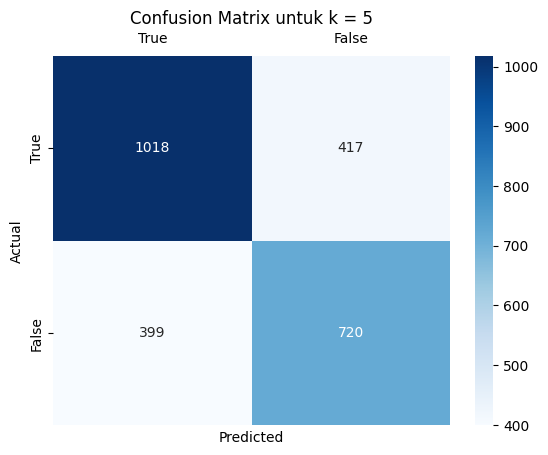

 
k =  7
Average Accuracy: 0.6984149953949678
Average Precision: 0.647410175786111
Average Recall: 0.644416150979233


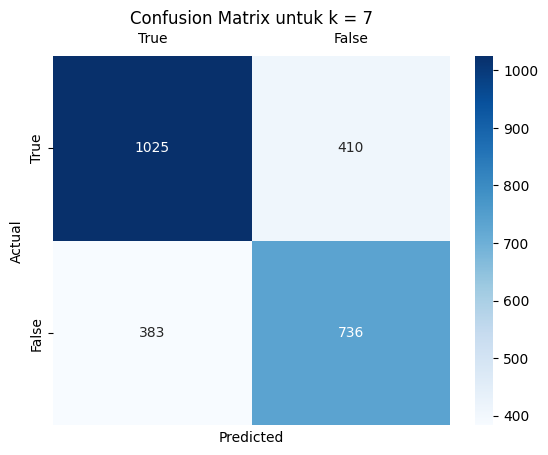

 
k =  9
Average Accuracy: 0.703033819786161
Average Precision: 0.6535134934697643
Average Recall: 0.6477898633854526


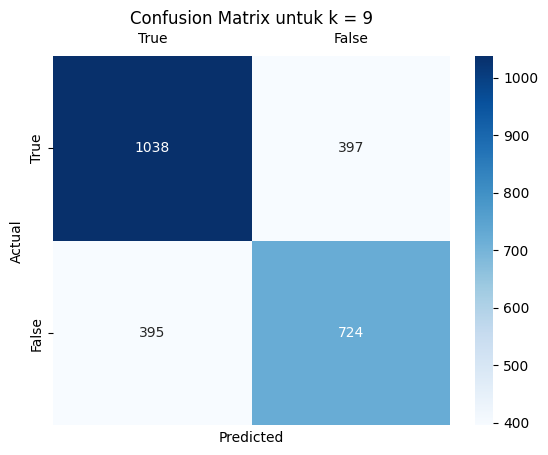

In [10]:
k_range = list(range(1,10,2))

for k in k_range:
    #Inisialisasi model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Inisialisasi K-Fold cross validator
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)

    # Menyimpan hasil evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Menyimpan hasil prediksi dan label sebenarnya
    y_pred_all = []
    y_true_all = []

    for train_index, test_index in kfold.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      lab = preprocessing.LabelEncoder()
      y_train = lab.fit_transform(y_train)
      y_test = lab.fit_transform(y_test)

      #Training model
      knn.fit(X_train, y_train)

      #Prediksi
      y_pred = knn.predict(X_test)

      # Menyimpan prediksi dan label sebenarnya
      y_pred_all.extend(y_pred)
      y_true_all.extend(y_test)

      # Menghitung confusion matrix
      cm = confusion_matrix(y_test, y_pred)

      # Menghitung akurasi
      accuracy = accuracy_score(y_test, y_pred)
      accuracy_scores.append(accuracy)

      # Menghitung presisi
      precision = precision_score(y_test, y_pred, pos_label=True, average='binary')
      precision_scores.append(precision)

      # Menghitung recall
      recall = recall_score(y_test, y_pred, pos_label=True, average='binary')
      recall_scores.append(recall)

    # Menampilkan hasil evaluasi rata-rata dari 10 fold
    print("k = ", k)
    print("Average Accuracy:", np.mean(accuracy_scores))
    print("Average Precision:", np.mean(precision_scores))
    print("Average Recall:", np.mean(recall_scores))
    #Menampilkan Confusion Matrix
    ax= plt.subplot()
    sn.heatmap(cm, annot=True ,cmap="Blues", ax=ax, fmt = 'g')
    cmTitle = "Confusion Matrix untuk k = " + str(k)
    ax.set_title(cmTitle)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.xaxis.set_ticklabels(['True', 'False'])
    ax.yaxis.set_ticklabels(['True', 'False'])
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    pltNew.show()
    print(" ")
